---
# 딥러닝 분류

- Outcome을 Label로
- 이진분류 사용
- binary_crossentropy + sigmoid

In [14]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
X = df.drop("Outcome", axis=1).values
Y = df['Outcome'].values

X, Y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [11]:
y = pd.get_dummies(Y).values
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576, 2), (192, 2))

UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. 
<br>When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
<br><br>해결 방법

from tensorflow import keras <br>
model.add(keras.Input(shape=(Feature Count,))) <br>

In [491]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

from tensorflow import keras
model.add(keras.Input(shape=(8,)))
model.add(Dense(11, activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_278 (Dense)                    │ (None, 11)                  │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_279 (Dense)                    │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_280 (Dense)                    │ (None, 12)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [493]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.2)
# model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4300 - loss: 9.7504 - val_accuracy: 0.5862 - val_loss: 0.8737
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6435 - loss: 0.7558 - val_accuracy: 0.6207 - val_loss: 0.7934
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6366 - loss: 0.7214 - val_accuracy: 0.6552 - val_loss: 0.6092
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6953 - loss: 0.6241 - val_accuracy: 0.6552 - val_loss: 0.6174
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6716 - loss: 0.6107 - val_accuracy: 0.6552 - val_loss: 0.6156
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6816 - loss: 0.6157 - val_accuracy: 0.6552 - val_loss: 0.6108
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6435 - loss: 0.6276 - val_accuracy: 0.6293 - val_loss: 0.6406
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6602 - loss: 0.6278 - val_accuracy: 0.6379 - val_loss

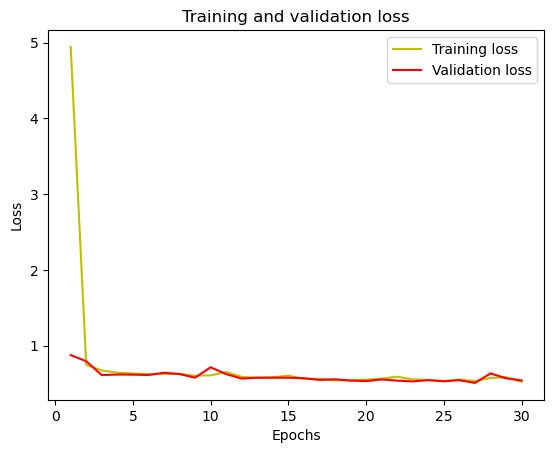

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

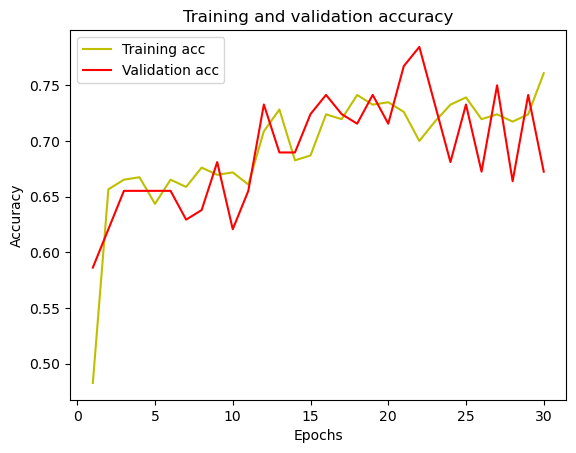

In [495]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [496]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       126
           1       0.84      0.41      0.55        66

    accuracy                           0.77       192
   macro avg       0.80      0.68      0.70       192
weighted avg       0.79      0.77      0.74       192

[[121   5]
 [ 39  27]]


---
# 딥러닝 회귀

- BMI를 Label로
- None + mse

In [511]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [515]:
df["BMI"].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [509]:
X = df.drop(["BMI", "Outcome"], axis=1).values
Y = df["BMI"].values

X, Y

(array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]]),
 array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
        38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
        39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
        19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
        27.4, 42. , 29.7, 28. , 39.1,  0. , 19.4, 24.2, 24.4, 33.7, 34.7,
        23. , 37.7, 46.8, 40.5, 41.5,  0. , 32.9, 25. , 25.4, 32.8, 29. ,
        32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6,
        37.7, 43.2, 25. , 22.4,  0. , 29.3, 24.6, 48.

In [521]:
y = pd.get_dummies(Y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [527]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [786]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_396 (Dense)                    │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_397 (Dense)                    │ (None, 11)                  │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_398 (Dense)                    │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_399 (Dense)                    │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_400 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407 (1.59 KB)

 Trainable params: 407 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [788]:
EPOCHS = 15
history=model.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=32,validation_split=0.2)
y_pred = model.predict(X_test)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 31.3365 - mse: 31.3365 - val_loss: 6.6659 - val_mse: 6.6659
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2619 - mse: 6.2619 - val_loss: 3.4603 - val_mse: 3.4603
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6060 - mse: 4.6060 - val_loss: 2.3700 - val_mse: 2.3700
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2015 - mse: 2.2015 - val_loss: 1.0189 - val_mse: 1.0189
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8614 - mse: 0.8614 - val_loss: 1.0573 - val_mse: 1.0573
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6236 - mse: 0.6236 - val_loss: 0.3799 - val_mse: 0.3799
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4715 - mse: 0.4715 - val_loss: 0.8520 - val_mse: 0.8520
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3648 - mse: 0.3648 - val_loss: 0.2080 - val_mse: 0.2080
Epoch 9/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2803 - ms

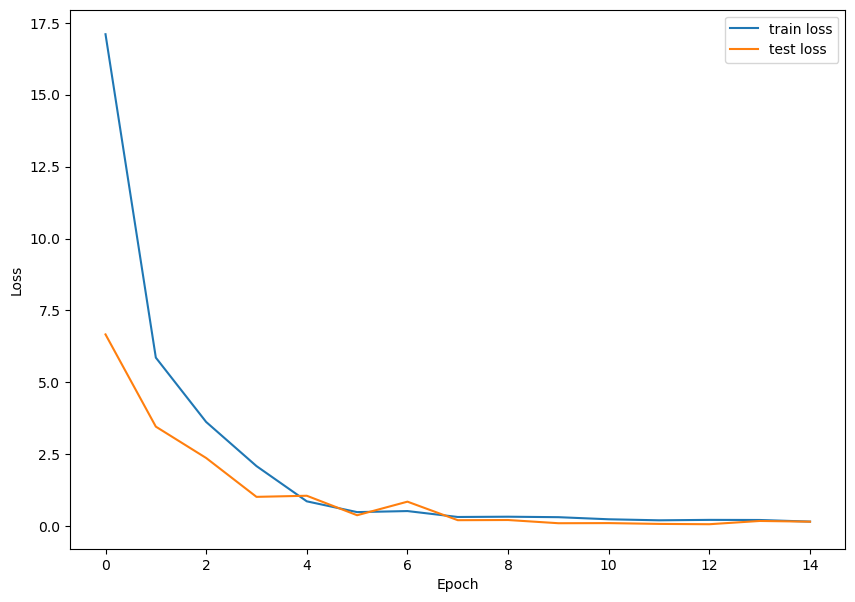

In [789]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [790]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1302 - mse: 0.1302 


[0.13040770590305328, 0.13040770590305328]